# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [1]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import nibabel as nib

import os

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [2]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label

In [3]:
imgFolder = '/data/TrainingSet/images'
labelFolder = '/data/TrainingSet/labels'

imgFiles = os.listdir(imgFolder)
labelFiles = os.listdir(labelFolder)

print('Number of Training images: ', len(imgFiles))
print('Number of Training labels: ', len(labelFiles))

Number of Training images:  263
Number of Training labels:  262


Looks like there is an image without a label in this EDA and we need to remove it

In [4]:
removedFile = set(imgFiles) - set(labelFiles)
removedFile

{'hippocampus_118.nii.gz'}

In [5]:
imgFiles = list(set(imgFiles) - removedFile)

In [6]:
len(imgFiles)

262

Next, create a list of paths of the image and label files

In [7]:
allImgs = [os.path.join(imgFolder, x) for x in imgFiles]
allLabels = [os.path.join(labelFolder, x) for x in labelFiles]

Select a sample image and label file for EDA

In [8]:
sampleFile = 'hippocampus_376.nii.gz'
imgPath = os.path.join(imgFolder, sampleFile)
labelPath = os.path.join(labelFolder, sampleFile)

print('Sample image path: ', imgPath)
print('Sample label path: ', labelPath)

Sample image path:  /data/TrainingSet/images/hippocampus_376.nii.gz
Sample label path:  /data/TrainingSet/labels/hippocampus_376.nii.gz


In [9]:
img = nib.load(imgPath)
label = nib.load(os.path.join(labelFolder, labelPath))

In [10]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)

In [11]:
img_np = img.get_fdata()
print('Dimensions of the image array: ', img_np.shape)

label_np = label.get_fdata()
print('Dimensions of the label array: ', img_np.shape)

Dimensions of the image array:  (35, 55, 37)
Dimensions of the label array:  (35, 55, 37)


Slice across X-Axis -> Sagittal plane (Left/Right)

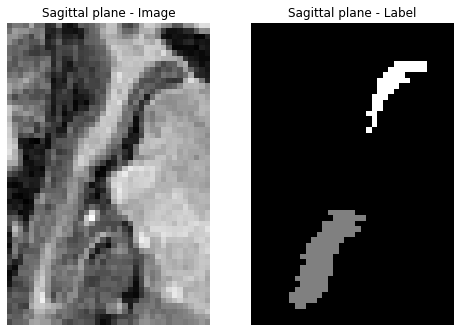

In [12]:
plt.figure(figsize=(8, 6))
x_index = 20

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img_np[x_index, :, :], cmap='gray');
ax1.set_title('Sagittal plane - Image');
ax1.axis('off');

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(label_np[x_index, :, :], cmap='gray');
ax2.set_title('Sagittal plane - Label');
ax2.axis('off');

Slice across Y-Axis -> Coronal plane (Back/Front)

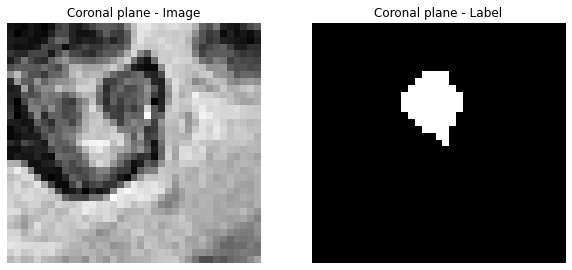

In [13]:
plt.figure(figsize=(10, 10))
y_index = 25

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img_np[:, y_index, :], cmap='gray');
ax1.set_title('Coronal plane - Image');
ax1.axis('off');

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(label_np[:, y_index, :], cmap='gray');
ax2.set_title('Coronal plane - Label');
ax2.axis('off');

Slice across Z-Axis -> Axial plane (Top/Bottom)

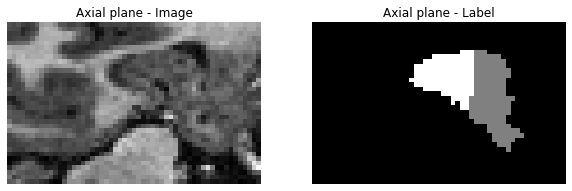

In [14]:
plt.figure(figsize=(10, 14))
z_index = 15

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img_np[:, :, z_index], cmap='gray');
ax1.set_title('Axial plane - Image');
ax1.axis('off');

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(label_np[:, :, z_index], cmap='gray');
ax2.set_title('Axial plane - Label');
ax2.axis('off');

Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [15]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

Below is the Volume Rendering of the '/data/TrainingSet/images/hippocampus_376.nii.gz' that I have inspected in 3D Slicer:

![Volume Rendering of hippocampus_376.nii.gz](volume_with_label_376.png)

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [16]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

In [17]:
img_header = img.header_class()

In [18]:
print('Format of our images: ', img_header.extensions)

Format of our images:  Nifti1Extensions()


Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [19]:
print(img_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [0 1 1 1 1 1 1 1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : 1.0
scl_inter       : 0.0
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 0. 0. 0.]
srow_y          : [0. 0. 0. 0.]
srow_z 

In [20]:
# TASK: How many bits per pixel are used?
print('Bits per pixel: ', img.header['bitpix'])

Bits per pixel:  32


In [21]:
# TASK: What are the units of measurement?
print('Measurement Units: ', img.header.get_xyzt_units())

Measurement Units:  ('mm', 'sec')


* Spatial measurement unit: Millimeter (mm)
* Temporal measurement unit: Second (sec)

In [22]:
# TASK: Do we have a regular grid? What are grid spacings?

img.header['pixdim']

array([1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

We have a regular grid.
* The pixel spacing is 1 mm
* The slice thickness is also 1 mm

In [23]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?

Based on the images and a screenshot from 3D Slicer above:
* a slice across x-Axis -> **Sagittal** plane (Left/Right)
* a slice across y-Axis -> **Coronal** plane (Back/Front)
* a slice across z-Axis -> **Axial** plane (Top/Bottom)

In [24]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

In [25]:
# Load a corresponding label image which is a 3D mask for a hippocampus


In [26]:
print('Mask values: ', np.unique(label_np))

Mask values:  [0. 1. 2.]


In [27]:
# Compute the volume of a hippocampus
nonzero_voxel_count = np.count_nonzero(label_np)
single_voxel_volume = 1 * 1 * 1
print('Volume of a hippocampus: {} mm'.format(nonzero_voxel_count * single_voxel_volume))

Volume of a hippocampus: 3581 mm


## Plotting some charts

In [28]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

<img src="nomogram_fem_right.svg" width=400 align=left>

In [29]:
# Collect a hippocampus volume of training data
hippo_data = [np.count_nonzero(data) for data in (nib.load(file).get_fdata() for file in allLabels)]

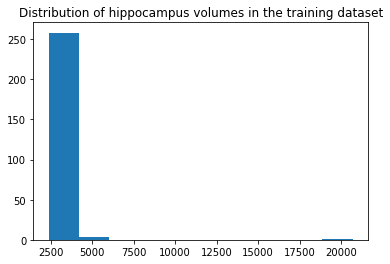

In [30]:
plt.hist(hippo_data);
plt.title('Distribution of hippocampus volumes in the training dataset');

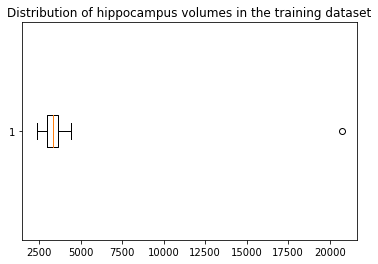

In [31]:
plt.boxplot(hippo_data, vert=False);
plt.title('Distribution of hippocampus volumes in the training dataset');

In [32]:
stats.describe(hippo_data)

DescribeResult(nobs=262, minmax=(2382, 20702), mean=3362.259541984733, variance=1342850.085636571, skewness=12.83343928269365, kurtosis=189.8618492072511)

In [33]:
print('25% Quantile: ', np.quantile(hippo_data, 0.25))
print('75% Quantile: ', np.quantile(hippo_data, 0.75))

25% Quantile:  2951.5
75% Quantile:  3626.75


Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In [34]:
# Find the outlier image
idx_label_outlier = np.argmax(hippo_data)
allLabels[idx_label_outlier]

'/data/TrainingSet/labels/hippocampus_281.nii.gz'

Inspect the header of the outlier image

In [35]:
outlier_label_path = os.path.join(labelFolder, 'hippocampus_281.nii.gz')
outlier_label = nib.load(outlier_label_path)
print(outlier_label.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  94   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.       0.734375 0.734375 5.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -375.26562
qoffset_y       : -375.26562
qoffset_z 

In [36]:
outlier_label_np = outlier_label.get_fdata()
outlier_label_np.shape

(512, 512, 94)

Next, let's inspect the input image's shpe

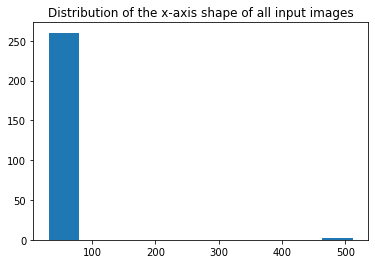

In [37]:
# Inspect the x-axis shape of all input images
all_img_shape0 = [data.shape[0] for data in (nib.load(file).get_fdata() for file in allImgs)]

plt.hist(all_img_shape0);
plt.title('Distribution of the x-axis shape of all input images');

Let's find out what this image is!

In [38]:
file_outlier = []
for file in allImgs:
    data = nib.load(file).get_fdata()
    if data.shape[0] > 100:
        file_outlier.append(file)
    

In [39]:
file_outlier

['/data/TrainingSet/images/hippocampus_010.nii.gz',
 '/data/TrainingSet/images/hippocampus_281.nii.gz']

Inspect the additional outlier image 

In [40]:
outlier_img = nib.load(os.path.join(imgFolder, 'hippocampus_010.nii.gz'))
print(outlier_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 241   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.597656  0.597656  1.25      0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 144.2
qoffset_y       : -152.40222
qoffset_z

The outlier is due to an unexpected image in the training dataset (Brain MRI). Hence, we need to remove this data from the dataset before plotting the histogram

In [42]:
# Clean image and label data
allImgs_clean = list(set(allImgs)-set(file_outlier))
allLabels_clean = list(set(allLabels)-set([os.path.join(labelFolder, x) for x in ['hippocampus_010.nii.gz', 'hippocampus_281.nii.gz']]))

print('Number of image data: ', len(allImgs_clean))
print('Number of label data: ', len(allLabels_clean))

Number of image data:  260
Number of label data:  260


In [43]:
hippo_data_clean = [np.count_nonzero(data) for data in (nib.load(file).get_fdata() for file in allLabels_clean)]

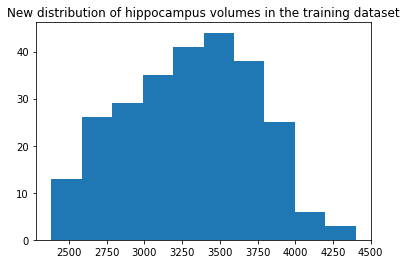

In [44]:
plt.hist(hippo_data_clean);
plt.title('New distribution of hippocampus volumes in the training dataset');

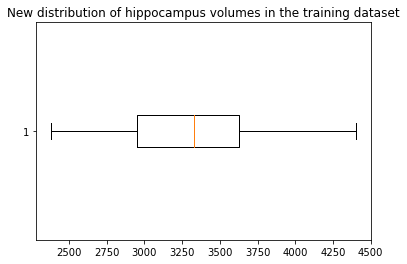

In [45]:
plt.boxplot(hippo_data_clean, vert=False);
plt.title('New distribution of hippocampus volumes in the training dataset');

In [46]:
stats.describe(hippo_data_clean)

DescribeResult(nobs=260, minmax=(2382, 4401), mean=3295.2076923076925, variance=187797.44704484704, skewness=-0.0632271605057867, kurtosis=-0.6503373744365928)

In [47]:
print('25% Quantile: ', np.quantile(hippo_data, 0.25))
print('75% Quantile: ', np.quantile(hippo_data, 0.75))

25% Quantile:  2951.5
75% Quantile:  3626.75


In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [52]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section

allImgs_clean.sort()
allLabels_clean.sort()

In [54]:
import shutil

outFolder = 'out'

for img, label in zip(allImgs_clean, allLabels_clean):
    
    shutil.copy(img, os.path.join(outFolder, 'images', os.path.basename(img)))
    shutil.copy(label, os.path.join(outFolder, 'labels', os.path.basename(label)))

In [55]:
print('Number of files in out/images: ', len(os.listdir(os.path.join(outFolder, 'images'))))
print('Number of files in out/labels: ', len(os.listdir(os.path.join(outFolder, 'labels'))))

Number of files in out/images:  260
Number of files in out/labels:  260


In [56]:
!jupyter nbconvert --to html 'Final Project EDA.ipynb'

/root/miniconda3/envs/medai/lib/python3.8/site-packages/traitlets/config/loader.py:795: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(key) is 1:
/root/miniconda3/envs/medai/lib/python3.8/site-packages/traitlets/config/loader.py:804: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(key) is 1:
[NbConvertApp] Converting notebook Final Project EDA.ipynb to html
[NbConvertApp] Writing 427265 bytes to Final Project EDA.html


## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!